# Amazon Best Selling Books

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler



## Reading CSV

In [3]:
# Load the Excel file
file_path = 'Amazon_Best_Selling_Books.xlsx'
df = pd.read_excel(file_path)

# Display the initial structure of the dataset
print("Initial dataset:")
df.head()


Initial dataset:


,Unnamed: 0,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,0,12.49,1.0,The Lost Symbol,16118.0,4.4,Dan Brown,Hardcover,2009,Fiction
1,1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,23392.0,4.7,William P. Young,Paperback,2009,Fiction
2,2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,5036.0,4.8,Mark R. Levin,Hardcover,2009,Non Fiction
3,3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)",16912.0,4.7,Stephenie Meyer,Hardcover,2009,Fiction
4,4,9.99,5.0,Going Rogue: An American Life,1572.0,4.6,Sarah Palin,Hardcover,2009,Non Fiction


In [4]:
df.shape

(1291, 10)

In [5]:
del df['Unnamed: 0']
df.head()

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,12.49,1.0,The Lost Symbol,16118.0,4.4,Dan Brown,Hardcover,2009,Fiction
1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,23392.0,4.7,William P. Young,Paperback,2009,Fiction
2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,5036.0,4.8,Mark R. Levin,Hardcover,2009,Non Fiction
3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)",16912.0,4.7,Stephenie Meyer,Hardcover,2009,Fiction
4,9.99,5.0,Going Rogue: An American Life,1572.0,4.6,Sarah Palin,Hardcover,2009,Non Fiction


In [6]:
# Drop unnecessary columns
df.drop(columns=['cover_type'], inplace=True)

# dropping 'cover_type'
print("\nDataset after dropping 'cover_type':")
print(df.head())



Dataset after dropping 'cover_type':
   price  ranks                                          title  no_of_reviews  \
0  12.49    1.0                                The Lost Symbol        16118.0   
1  13.40    2.0    The Shack: Where Tragedy Confronts Eternity        23392.0   
2   9.93    3.0  Liberty and Tyranny: A Conservative Manifesto         5036.0   
3  14.30    4.0      Breaking Dawn (The Twilight Saga, Book 4)        16912.0   
4   9.99    5.0                  Going Rogue: An American Life         1572.0   

   ratings            author  year        genre  
0      4.4         Dan Brown  2009      Fiction  
1      4.7  William P. Young  2009      Fiction  
2      4.8     Mark R. Levin  2009  Non Fiction  
3      4.7   Stephenie Meyer  2009      Fiction  
4      4.6       Sarah Palin  2009  Non Fiction  


In [7]:
# Rename columns names
new_columns = {
    'price': 'Price',
    'ranks': 'Sales_Rank',
    'title': 'Title',
    'no_of_reviews': 'Number_of_Reviews',
    'ratings': 'Ratings',
    'author': 'Author',
    'year': 'Publication Date',
    'genre': 'Genre'
}
df.rename(columns=new_columns, inplace=True)

# Display dataset with columns renamed
print("\nDataset with columns renamed:")
df.head()



Dataset with columns renamed:


,Price,Sales_Rank,Title,Number_of_Reviews,Ratings,Author,Publication Date,Genre
0,12.49,1.0,The Lost Symbol,16118.0,4.4,Dan Brown,2009,Fiction
1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,23392.0,4.7,William P. Young,2009,Fiction
2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,5036.0,4.8,Mark R. Levin,2009,Non Fiction
3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)",16912.0,4.7,Stephenie Meyer,2009,Fiction
4,9.99,5.0,Going Rogue: An American Life,1572.0,4.6,Sarah Palin,2009,Non Fiction


## Handling Null / Missing Values

In [8]:
# Handle missing values: Impute or remove missing data
# Impute missing numerical values (Price, Ratings, Number of Reviews) with mean
df['Price'].fillna(df['Price'].mean(), inplace=True)
df['Ratings'].fillna(df['Ratings'].mean(), inplace=True)
df['Number_of_Reviews'].fillna(df['Number_of_Reviews'].mean(), inplace=True)
df['Sales_Rank'].fillna(df['Sales_Rank'].mean(), inplace=True)
# Impute categorical data (Genre) with the most frequent value
most_frequent_genre = df['Genre'].mode()[0]
df['Genre'].fillna(most_frequent_genre, inplace=True)

# Display dataset after handling missing values
print("\nDataset after handling missing values:")
df.head()



Dataset after handling missing values:


,Price,Sales_Rank,Title,Number_of_Reviews,Ratings,Author,Publication Date,Genre
0,12.49,1.0,The Lost Symbol,16118.0,4.4,Dan Brown,2009,Fiction
1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,23392.0,4.7,William P. Young,2009,Fiction
2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,5036.0,4.8,Mark R. Levin,2009,Non Fiction
3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)",16912.0,4.7,Stephenie Meyer,2009,Fiction
4,9.99,5.0,Going Rogue: An American Life,1572.0,4.6,Sarah Palin,2009,Non Fiction


## Handling Duplicates

In [12]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Display dataset after removing duplicates
print("\nDataset after removing duplicates:")
print(df.head())



Dataset after removing duplicates:
   Price  Sales_Rank                                          Title  \
0  12.49         1.0                                The Lost Symbol   
1  13.40         2.0    The Shack: Where Tragedy Confronts Eternity   
2   9.93         3.0  Liberty and Tyranny: A Conservative Manifesto   
3  14.30         4.0      Breaking Dawn (The Twilight Saga, Book 4)   
4   9.99         5.0                  Going Rogue: An American Life   

   Number_of_Reviews  Ratings            Author  Publication Date        Genre  
0            16118.0      4.4         Dan Brown              2009      Fiction  
1            23392.0      4.7  William P. Young              2009      Fiction  
2             5036.0      4.8     Mark R. Levin              2009  Non Fiction  
3            16912.0      4.7   Stephenie Meyer              2009      Fiction  
4             1572.0      4.6       Sarah Palin              2009  Non Fiction  


## Handling Outliers

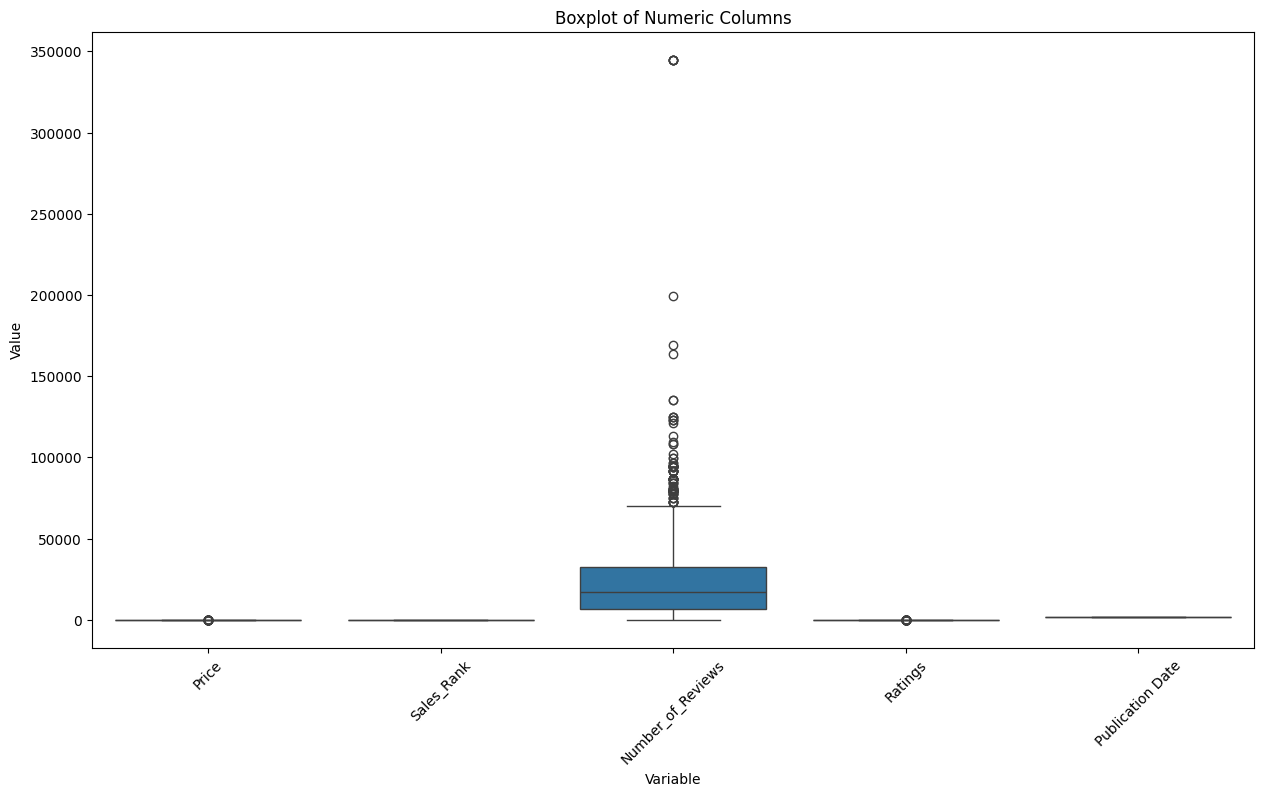

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Melt the DataFrame to a long format for numeric columns
df_melted = df.melt(value_vars=numeric_cols, var_name='variable', value_name='value')

# Create the boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title('Boxplot of Numeric Columns')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

## Outliers after handling

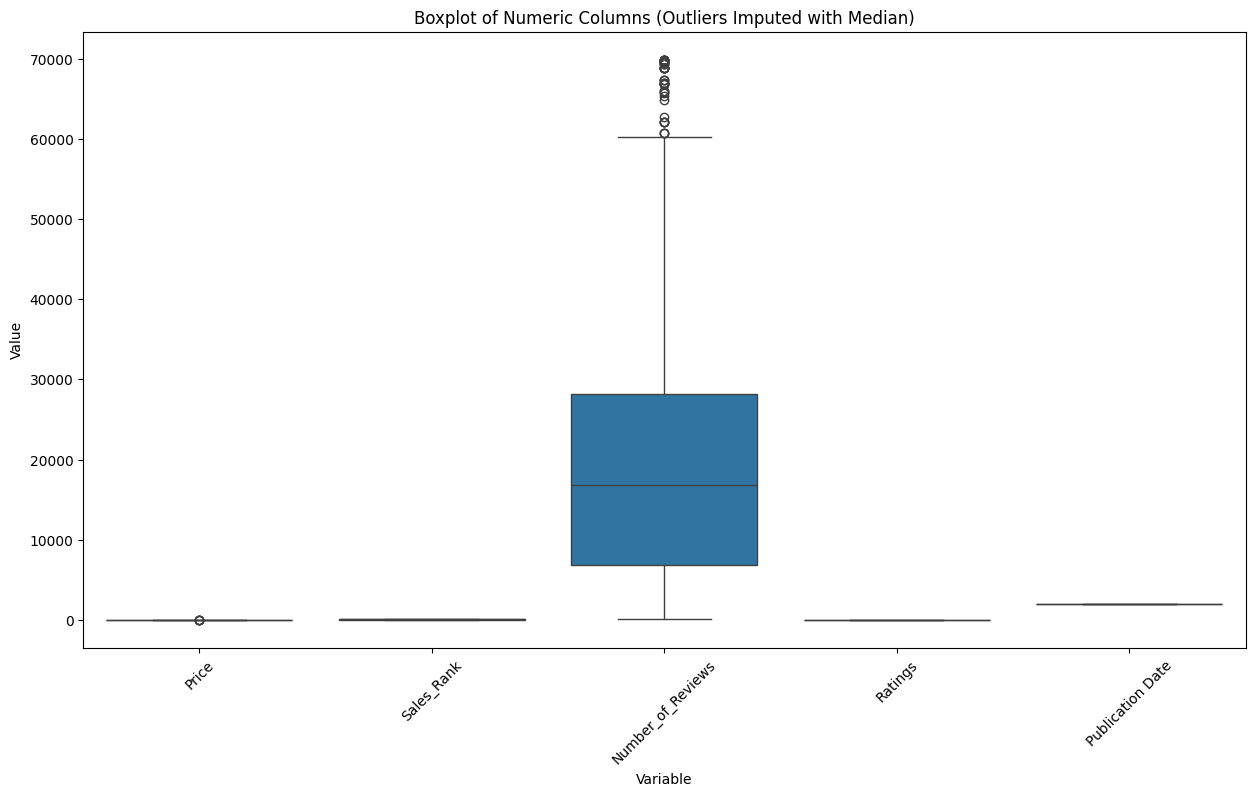

In [15]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Function to replace outliers with median
def replace_outliers_with_median(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[col].median()
    df[col] = df[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

# Apply the function to each numeric column
for col in numeric_cols:
    replace_outliers_with_median(df, col)

# Melt the DataFrame to a long format for numeric columns
df_melted = df.melt(value_vars=numeric_cols, var_name='variable', value_name='value')

# Create the boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title('Boxplot of Numeric Columns (Outliers Imputed with Median)')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Normalize numerical data using Min-Max scaling
scaler = MinMaxScaler()
df[[ 'Number_of_Reviews']] = scaler.fit_transform(df[[ 'Number_of_Reviews']])

# Display dataset after normalizing numerical data
print("\nDataset after normalizing numerical data:")
df.head()



Dataset after normalizing numerical data:


,Price,Sales_Rank,Title,Number_of_Reviews,Ratings,Author,Publication Date,Genre
0,12.49,1.0,The Lost Symbol,0.230148,4.4,Dan Brown,2009,Fiction
1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,0.334336,4.7,William P. Young,2009,Fiction
2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,0.071416,4.8,Mark R. Levin,2009,Non Fiction
3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)",0.241521,4.7,Stephenie Meyer,2009,Fiction
4,9.99,5.0,Going Rogue: An American Life,0.021800,4.6,Sarah Palin,2009,Non Fiction


In [18]:
# Save the cleaned dataset to a new CSV file
output_file = 'Cleaned_Dataset.csv'
df.to_csv(output_file, index=False)

print(f"\nCleaned dataset saved as '{output_file}' in the current folder.")



Cleaned dataset saved as 'Cleaned_Dataset.csv' in the current folder.


In [19]:
# Load the cleaned dataset
df_new = pd.read_csv('Cleaned_Dataset.csv')
df_new.head()

,Price,Sales_Rank,Title,Number_of_Reviews,Ratings,Author,Publication Date,Genre
0,12.49,1.0,The Lost Symbol,0.230148,4.4,Dan Brown,2009,Fiction
1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,0.334336,4.7,William P. Young,2009,Fiction
2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,0.071416,4.8,Mark R. Levin,2009,Non Fiction
3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)",0.241521,4.7,Stephenie Meyer,2009,Fiction
4,9.99,5.0,Going Rogue: An American Life,0.021800,4.6,Sarah Palin,2009,Non Fiction


In [20]:
df_new.shape

(1291, 8)

# EDA

In [21]:
mean_price = df_new['Price'].mean()
median_price = df_new['Price'].median()
mode_price = df_new['Price'].mode()[0]
std_price = df_new['Price'].std()


In [22]:
ratings_mean = df_new['Ratings'].mean()
ratings_median = df_new['Ratings'].median()
ratings_mode = df_new['Ratings'].mode()[0]
ratings_std = df_new['Ratings'].std()

print(f"Price - Mean: {mean_price}, Median: {median_price}, Mode: {mode_price}, Std: {std_price}")
print(f"Ratings - Mean: {ratings_mean}, Median: {ratings_median}, Mode: {ratings_mode}, Std: {ratings_std}")


Price - Mean: 12.471617714413997, Median: 12.15, Mode: 12.15, Std: 5.18831716122966
Ratings - Mean: 4.677771939739407, Median: 4.7, Mode: 4.7, Std: 0.1474374913968176


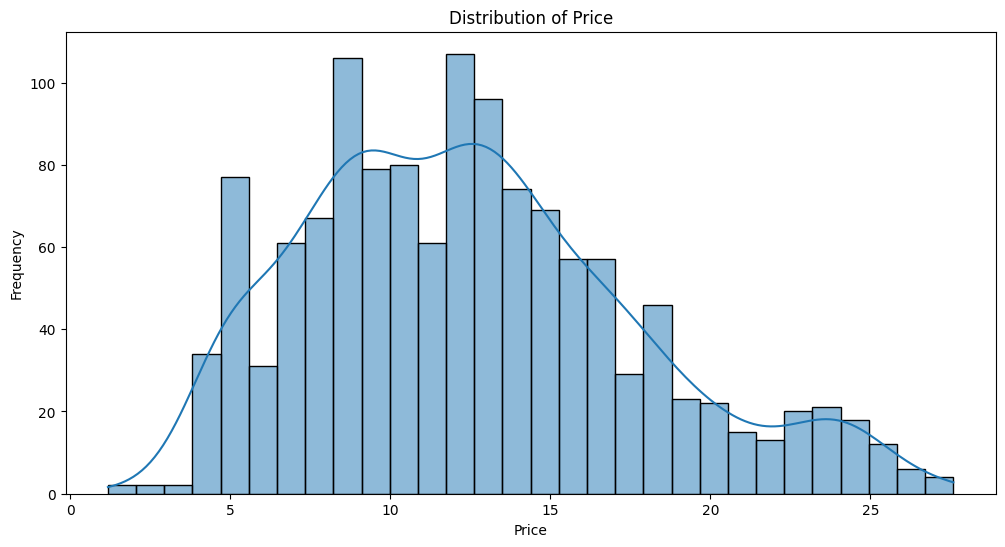

In [23]:
# Importing matplotlib for data visualization
import matplotlib.pyplot as plt

# Histograms
plt.figure(figsize=(12, 6))
sns.histplot(df_new['Price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

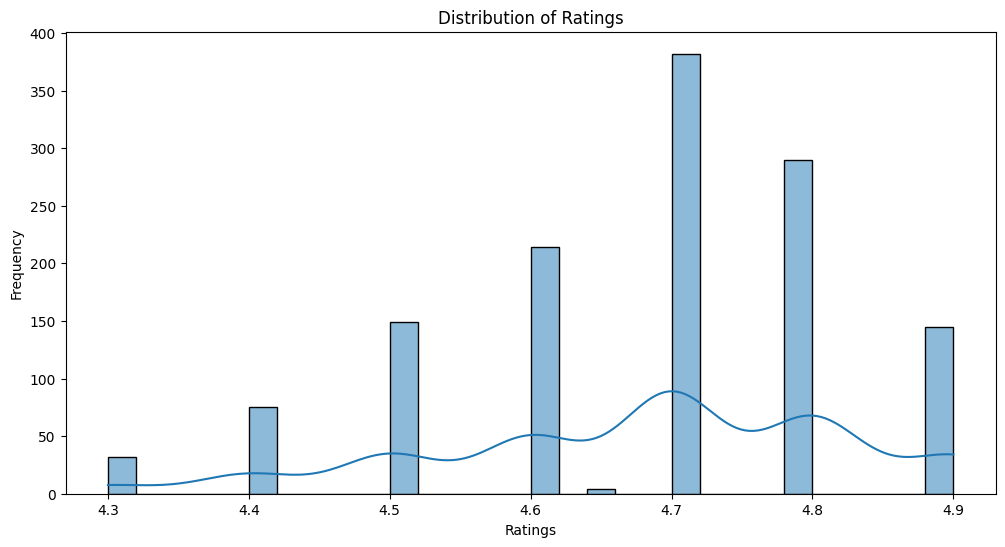

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(df_new['Ratings'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

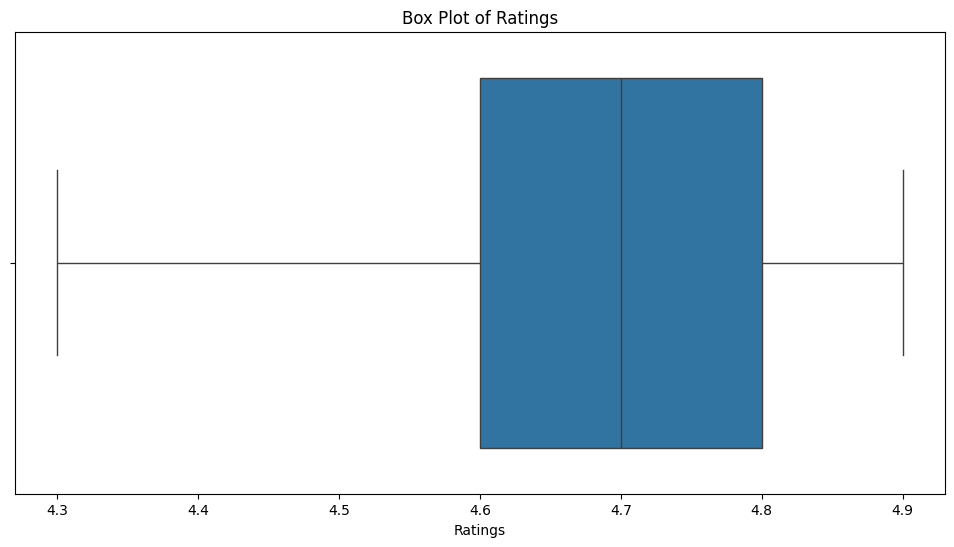

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_new['Ratings'])
plt.title('Box Plot of Ratings')
plt.xlabel('Ratings')
plt.show()

#Data Visualization

Bar Chart for Genre Distribution_ shows the distribution of different genres in the dataset

<ipython-input-26-1e403d73445a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_new, x='Genre', order=df['Genre'].value_counts().index, palette='viridis')


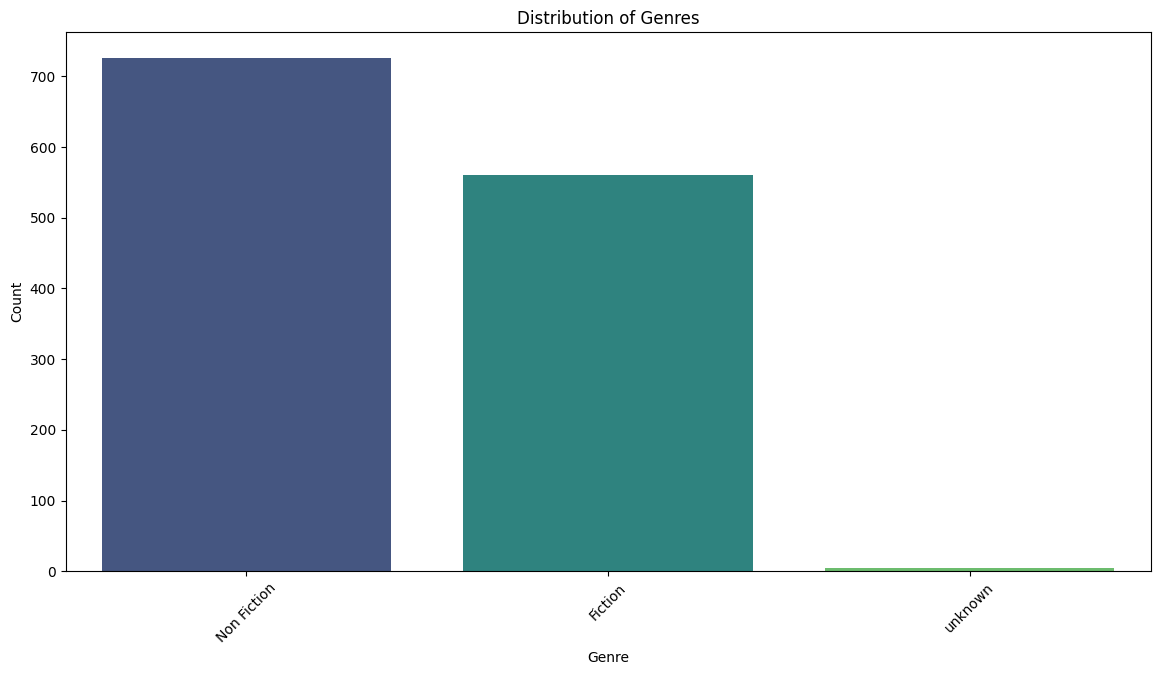

In [26]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df_new, x='Genre', order=df['Genre'].value_counts().index, palette='viridis')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Pie chart showing distribution among different authors (top 10)

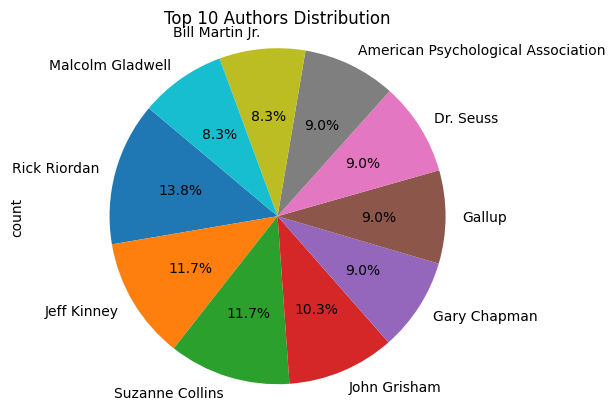

In [27]:

top_authors = df_new['Author'].value_counts().head(10)
top_authors.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Authors Distribution')
plt.show()



Bar Chart for Top 10 Authors by Number of Books This will highlight the authors with the most books in the dataset.

<ipython-input-28-dc518d973484>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.index, y=top_authors.values, palette='magma')


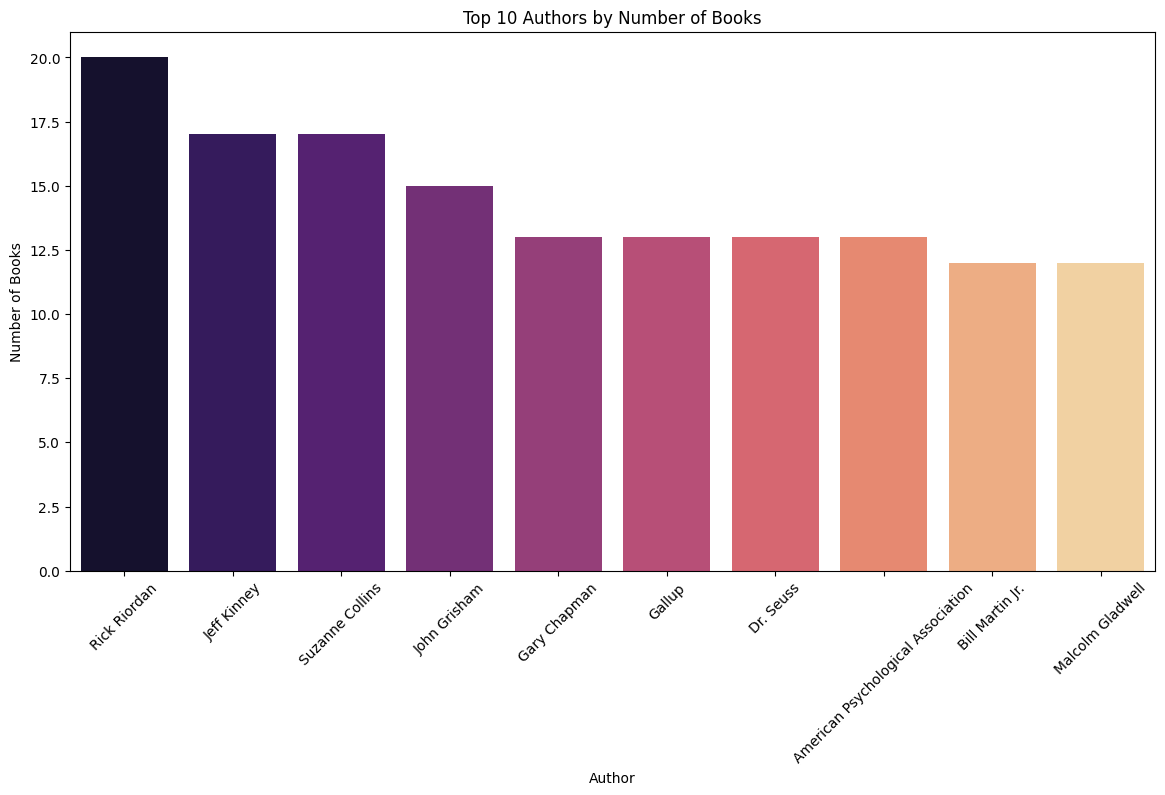

In [28]:
top_authors = df_new['Author'].value_counts().head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_authors.index, y=top_authors.values, palette='magma')
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()


Line Graph for Trends Over Time This will illustrate how the number of bestselling books has changed over the years.

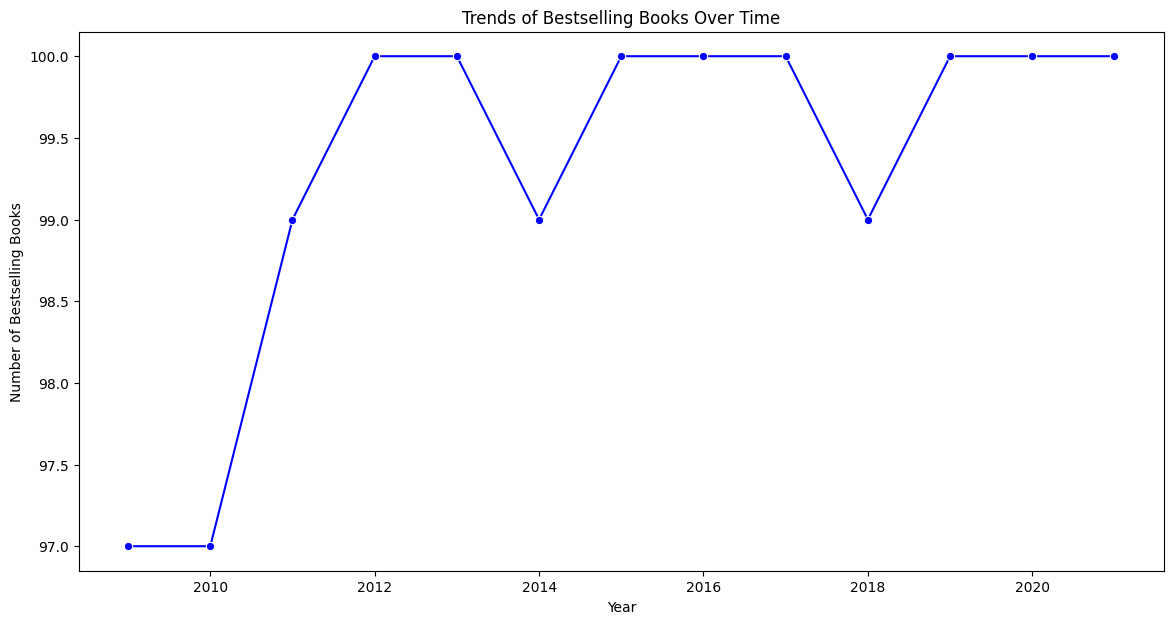

In [29]:
df_new['Publication Date'] = pd.to_datetime(df_new['Publication Date'], format='%Y')
df_new['Year'] = df_new['Publication Date'].dt.year

books_per_year = df_new['Year'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x=books_per_year.index, y=books_per_year.values, marker='o', color='b')
plt.title('Trends of Bestselling Books Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Bestselling Books')
plt.show()


Average Ratings of Bestselling Books Over Time __ showing how the average ratings of bestselling books have changed over the years.

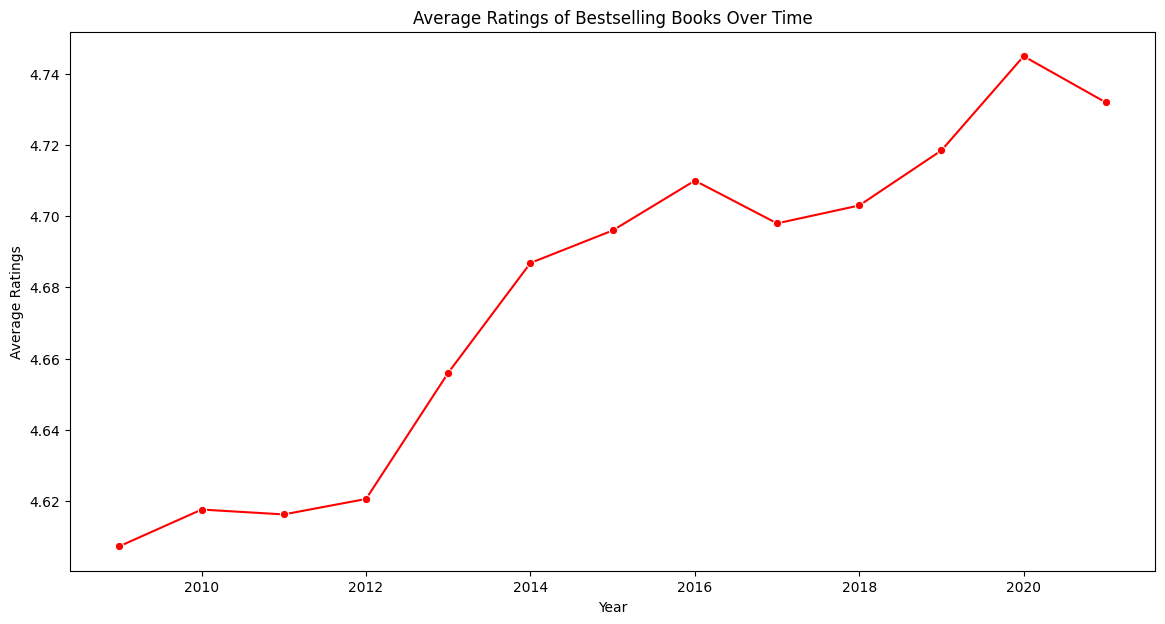

In [30]:
# e average ratings per year
average_ratings_per_year = df_new.groupby('Year')['Ratings'].mean()
# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(x=average_ratings_per_year.index, y=average_ratings_per_year.values, marker='o', color='r')
plt.title('Average Ratings of Bestselling Books Over Time')
plt.xlabel('Year')
plt.ylabel('Average Ratings')
plt.show()


Heatmap

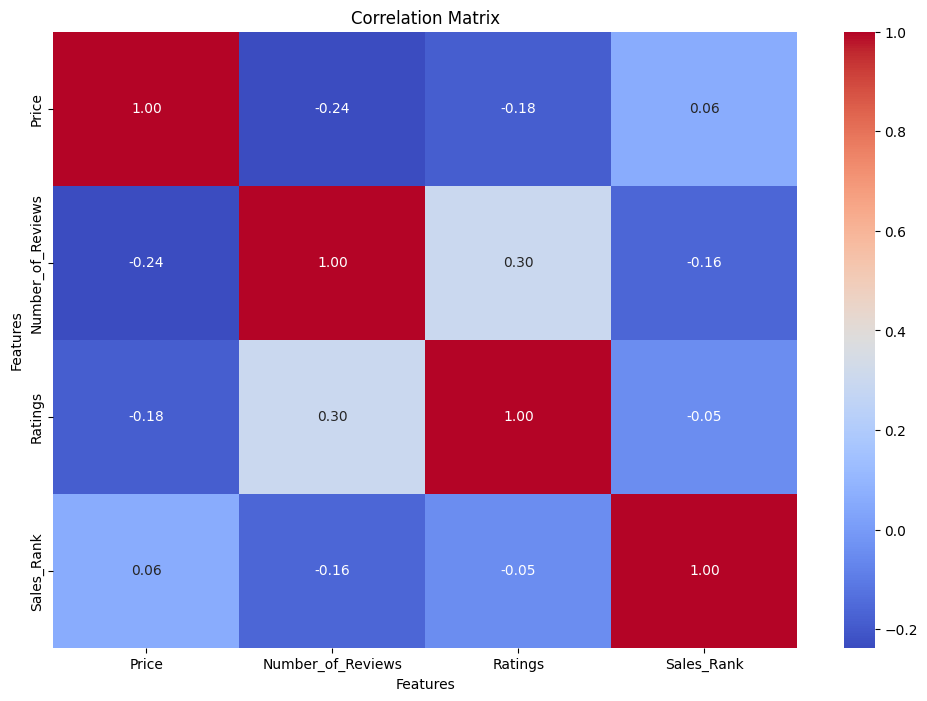

In [31]:
# correlation matrix computation
corr_matrix = df_new[['Price', 'Number_of_Reviews', 'Ratings','Sales_Rank']].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Matrix')

plt.show()


Scatter PLOT

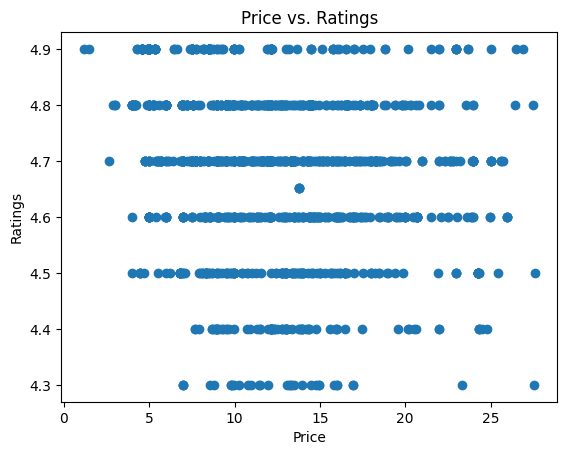

In [32]:


plt.scatter(df_new['Price'], df_new['Ratings'])
plt.xlabel('Price')
plt.ylabel('Ratings')
plt.title('Price vs. Ratings')
plt.show()


3D Visualization

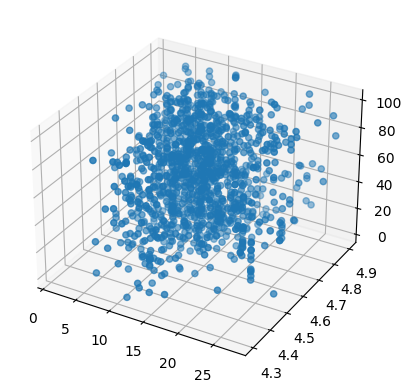

In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_new['Price'], df_new['Ratings'], df_new['Sales_Rank'])
plt.show()


In [35]:
df_new.drop(columns=['Publication Date'], inplace=True)
df_new.head()

,Price,Sales_Rank,Title,Number_of_Reviews,Ratings,Author,Genre,Year
0,12.49,1.0,The Lost Symbol,0.230148,4.4,Dan Brown,Fiction,2009
1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,0.334336,4.7,William P. Young,Fiction,2009
2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,0.071416,4.8,Mark R. Levin,Non Fiction,2009
3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)",0.241521,4.7,Stephenie Meyer,Fiction,2009
4,9.99,5.0,Going Rogue: An American Life,0.021800,4.6,Sarah Palin,Non Fiction,2009


# Hypothesisi Testing

In [36]:
df_new['Sales_Rank'].groupby(df_new['Genre']).mean()

Genre
Fiction        49.676018
Non Fiction    50.623268
unknown        61.811577
Name: Sales_Rank, dtype: float64

In [37]:
from scipy.stats import ttest_ind
genre1 = df_new[df_new['Genre'] == 'Fiction']['Sales_Rank']
genre2 = df_new[df_new['Genre'] == 'Non Fiction']['Sales_Rank']
#genre2 = df_new[df_new['Genre'] == 'unknown']['Sales_Rank']

# genre1 = genre1.dropna()
# genre2 = genre2.dropna()

# Perform T-test
t_stat, p_value = ttest_ind(genre1, genre2, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the two genres.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the two genres.")


T-statistic: -0.5841043220116328
P-value: 0.5592608141925042
Fail to reject the null hypothesis: No significant difference between the two genres.


**The output of your T-test indicates the following:**

T-statistic: -0.58 (approximately), suggesting that the means of the two groups (Fiction and Non-Fiction) are very close to each other. P-value: 0.55, which is much higher than the typical significance level (e.g., 0.05).

Interpretation:
Fail to Reject the Null Hypothesis: This means there is no statistically significant difference between the average sales ranks of Fiction and Non-Fiction genres in your dataset. The high P-value suggests that any observed difference in means is likely due to random chance. You can conclude that, based on this analysis, the sales ranks for the Fiction and Non-Fiction genres are similar.

In [38]:
from scipy.stats import chi2_contingency

df_new['TopSales'] = df_new['Sales_Rank'].apply(lambda x: 'Top' if x <=50 else 'Not Top')

# Create a contingency table
contingency_table = pd.crosstab(df_new['Genre'], df_new['TopSales'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value {p}")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between genre and top sales rank.")
else:
    print("Fail to reject the null hypothesis: No significant association between genre and top sales rank.")

Chi-square statistic: 1.0871845874167083
P-value 0.5806586050540592
Fail to reject the null hypothesis: No significant association between genre and top sales rank.


**The output of your Chi-square test indicates:**

In this case, the p-value is 0.5807, which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis. This means there is no significant association between the genre of the products and their sales rank (whether they are in the Top 50 or not).

In summary, the Chi-square test results suggest that the genre of the products does not have a significant impact on whether the products achieve a top sales rank.

# Regression Analysis

In [39]:
def RMSE(y,y_pred):
    E=y-y_pred
    SE=E**2
    MSE=SE.mean()
    RMSE=np.sqrt(MSE)
    return RMSE

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Extract relevant features and target variable
features = df_new[['Price', 'Number_of_Reviews', 'Ratings', 'Genre']]
target = df_new['Sales_Rank']

# Convert categorical variables to numerical form using OneHotEncoder
categorical_features = [ 'Genre']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = encoder.fit_transform(features[categorical_features])

# Create a new DataFrame with the encoded categorical features
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# Combine the numerical features with the encoded categorical features
numerical_features = features.drop(columns=categorical_features)
prepared_features = pd.concat([numerical_features, encoded_df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(prepared_features, target, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((1032, 5), (259, 5), (1032,), (259,))

In [46]:
# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = model.predict(X_test)

In [48]:
# Evaluate the Linear Regression model
score=RMSE(y_test,y_pred)
print(f'Linear Regression - MSE: {score}')


Linear Regression - MSE: 27.38414920761603


# Clustering

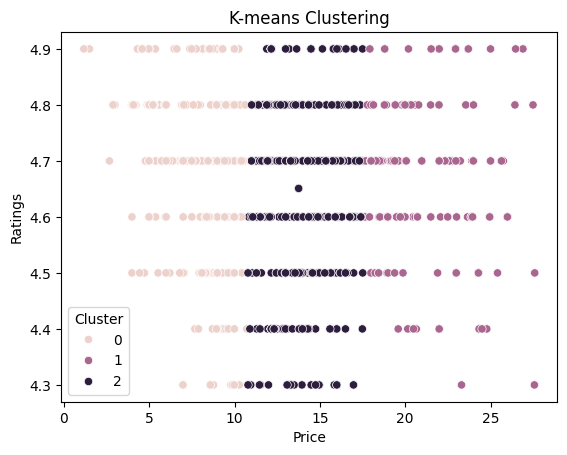

In [63]:
from sklearn.cluster import KMeans
# Clustering (example: k-means clustering)
kmeans = KMeans(n_clusters=3)
df_new['Cluster'] = kmeans.fit_predict(df_new[['Price', 'Ratings', 'Number_of_Reviews']])
sns.scatterplot(x='Price', y='Ratings', hue='Cluster', data=df_new)
plt.title('K-means Clustering')
plt.show()

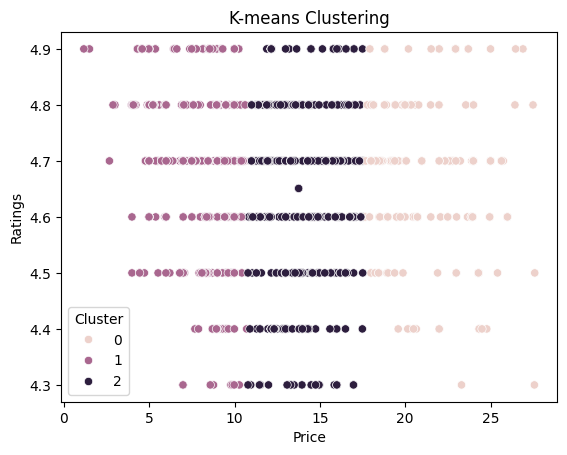

In [56]:
# from sklearn.cluster import KMeans
# # One-hot encode the 'Genre' column
# df_encoded = pd.get_dummies(df_new, columns=['Genre'])

# # Perform K-means clustering
# kmeans = KMeans(n_clusters=3)
# df_encoded['Cluster'] = kmeans.fit_predict(df_encoded[['Price', 'Ratings'] + [col for col in df_encoded.columns if 'Genre' in col]])

# # Add cluster labels back to the original dataframe
# df_new = df_new.copy()
# df_new['Cluster'] = df_encoded['Cluster']

# # Plotting
# sns.scatterplot(x='Price', y='Ratings', hue='Cluster', data=df_new)
# plt.title('K-means Clustering')
# plt.show()


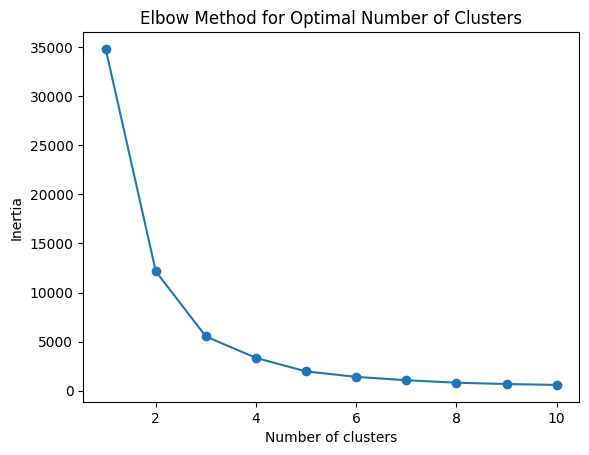

In [59]:
X = df[['Price', 'Ratings', 'Number_of_Reviews']]
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")
# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [60]:
# Fit the k-means model with the optimal number of clusters (e.g., 3 clusters)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [61]:
# Assign cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

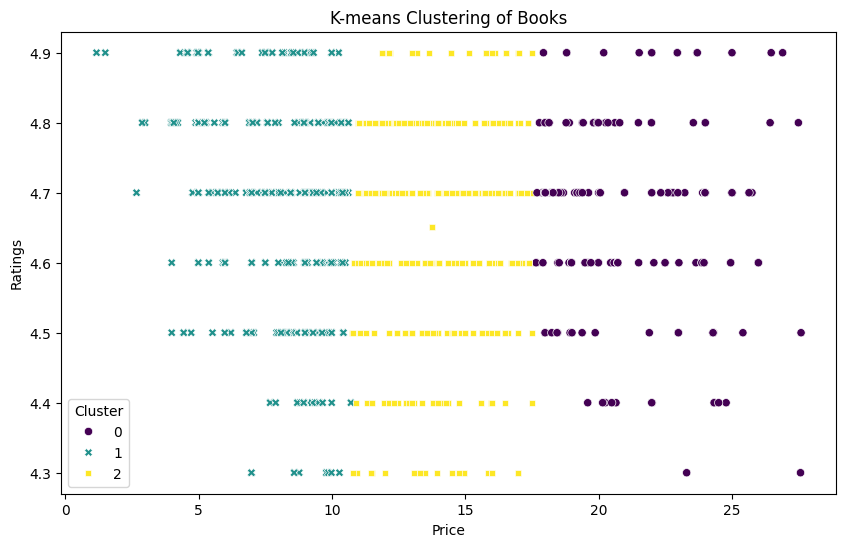

In [62]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_new, x='Price', y='Ratings', hue='Cluster', palette='viridis', style='Cluster')
plt.title('K-means Clustering of Books')
plt.show()